In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline


In [2]:
car_review = pd.read_csv('car_review.csv', index_col=0)

In [3]:
car_review.head()

,Rating,Year,Review,Brand
1,4,\n by JayeMaye\n ...,\n This is what I've bought Sat...,dodge-charger-2012/consumer-reviews/
2,5,\n by Female Driver\n ...,\n I just got my Special Order ...,dodge-charger-2012/consumer-reviews/
3,5,\n by New Car Buyer\n ...,\n About 2 months ago I purchas...,dodge-charger-2012/consumer-reviews/
4,5,\n by KTisaPhillyPhan\n ...,\n We bought a tungsten metalli...,dodge-charger-2012/consumer-reviews/
5,5,\n by I<3DODGE\n ...,\n I have a 2012 Dodge Charger ...,dodge-charger-2012/consumer-reviews/


In [4]:
car_review.Rating.value_counts()

5    14704
4     3211
3      730
2      313
1      284
Name: Rating, dtype: int64

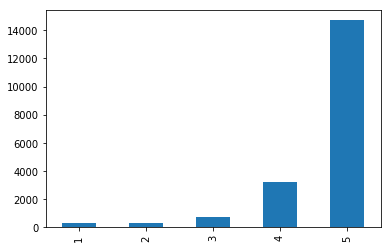

In [5]:
car_review.Rating.value_counts(sort=False).plot(kind = 'bar')
plt.show()

* Reviews are skewed towards positive

# Cleaning data and retrive features

### Car

In [6]:
car_review['Car'] = car_review.Brand.map(lambda x: x.split('/')[0])
car_review['Car_Year'] = car_review['Car'].map(lambda x: x.split('-')[-1])
car_review['Car_test'] = car_review['Car'].map(lambda x: x.split('-')[:-1])
car_review['Car_Make'] = car_review['Car_test'].map(lambda x: x[0])
car_review['Car_Model'] = car_review['Car_test'].map(lambda x: x[-1])

In [7]:
car_review.drop(['Car_test'], axis=1, inplace=True)

In [8]:
car_review.head()

,Rating,Year,Review,Brand,Car,Car_Year,Car_Make,Car_Model
1,4,\n by JayeMaye\n ...,\n This is what I've bought Sat...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger
2,5,\n by Female Driver\n ...,\n I just got my Special Order ...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger
3,5,\n by New Car Buyer\n ...,\n About 2 months ago I purchas...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger
4,5,\n by KTisaPhillyPhan\n ...,\n We bought a tungsten metalli...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger
5,5,\n by I<3DODGE\n ...,\n I have a 2012 Dodge Charger ...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger


### Reviews

In [9]:
car_review['Review'] = car_review['Review'].map(lambda x: x.rstrip().lstrip())

In [10]:
car_review['Review'].head()

1    This is what I've bought Saturday:\n2012 Dodge...
2    I just got my Special Order wiith my name on w...
3    About 2 months ago I purchased a new Dodge Cha...
4    We bought a tungsten metallic SXT-Plus Charger...
5    I have a 2012 Dodge Charger R/T Plus AWD in re...
Name: Review, dtype: object

### Date

In [11]:
from datetime import datetime

In [12]:
car_review['Review_Date'] = car_review['Year'].map(lambda x: 
                                                   datetime.strptime(x.split('\n')[-2].split('on')[-1].lstrip(), '%B %d, %Y'))
car_review['Review_Year'] = car_review['Review_Date'].map(lambda x: x.year)
car_review['Review_Month'] = car_review['Review_Date'].map(lambda x: x.month)
car_review['Review_Day'] = car_review['Review_Date'].map(lambda x: x.day)

In [13]:
car_review[['Review_Date', 'Review_Year', 'Review_Month', 'Review_Day']].head()

,Review_Date,Review_Year,Review_Month,Review_Day
1,2012-05-02,2012,5,2
2,2012-06-14,2012,6,14
3,2012-06-29,2012,6,29
4,2012-05-08,2012,5,8
5,2012-03-19,2012,3,19


### Car Age

In [14]:
int(car_review['Car_Year'][1])

2012

In [15]:
car_review['Car_Age'] = car_review['Review_Year'].map(lambda x: int(x))-car_review['Car_Year'].map(lambda x: int(x))

In [16]:
car_review['Car_Age'] = car_review['Car_Age'].map(lambda x: 0 if x==-1 else x)

In [17]:
car_review['Car_Age'].corr(car_review['Rating'])

-0.07932111336293686

There is a negative correlation between car age and rating which means that people will give newer car higher rating.

### Remove duplicate review
* There are some duplicate reviews in the dataset

In [18]:
car_review.shape

(19242, 13)

In [19]:
car_review.Review.nunique()

10821

In [20]:
car_review.Review.value_counts().head(5)

I am very happy with my purchase. No buyers remorse at all. Fast, fun, reliable and comfortable! Would highly recommend this car to anyone. You will not find more bang for you buck.                                                            52
A solid compact sedan. I owned a Civic years ago, and I like the emergency brake redesign. The gas cap is gone, and the lid over the gas fill intake locks when the doors lock, and unlocks when the doors unlock. This makes a lot of sense.    52
This car is great for you to travel with or just go out on the town with friends. This car feels great when you drive it around. The gas mileage is great also. I feel safe driving it.                                                          50
This is my first new car and I am happy with the comfort and look of the car.  The Civic Hatchback is great to handle and the technical aspects of the car are easy to understand.                                                               50
Excellent car. Excellent

In [21]:
car_review=car_review.drop_duplicates(subset=['Review'])

In [22]:
print('Number of unique reviews: ', car_review.Review.nunique())
print('Shape of the dataset: ', car_review.shape)

Number of unique reviews:  10821
Shape of the dataset:  (10821, 13)


In [23]:
car_review.head()

,Rating,Year,Review,Brand,Car,Car_Year,Car_Make,Car_Model,Review_Date,Review_Year,Review_Month,Review_Day,Car_Age
1,4,\n by JayeMaye\n ...,This is what I've bought Saturday:\n2012 Dodge...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger,2012-05-02,2012,5,2,0
2,5,\n by Female Driver\n ...,I just got my Special Order wiith my name on w...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger,2012-06-14,2012,6,14,0
3,5,\n by New Car Buyer\n ...,About 2 months ago I purchased a new Dodge Cha...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger,2012-06-29,2012,6,29,0
4,5,\n by KTisaPhillyPhan\n ...,We bought a tungsten metallic SXT-Plus Charger...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger,2012-05-08,2012,5,8,0
5,5,\n by I<3DODGE\n ...,I have a 2012 Dodge Charger R/T Plus AWD in re...,dodge-charger-2012/consumer-reviews/,dodge-charger-2012,2012,dodge,charger,2012-03-19,2012,3,19,0


In [24]:
car_review.Rating.value_counts()

5    7815
4    1943
3     538
2     273
1     252
Name: Rating, dtype: int64

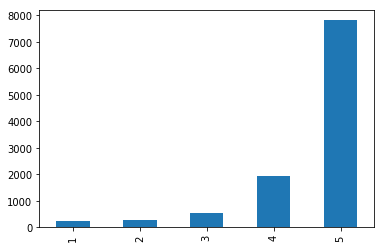

In [25]:
car_review.Rating.value_counts(sort=False).plot(kind = 'bar')
plt.show()

In [26]:
pd.crosstab(index=car_review.Rating, columns="count")/pd.crosstab(index=car_review.Rating, columns="count").sum()

col_0,count
Rating,
1,0.023288
2,0.025229
3,0.049718
4,0.179558
5,0.722207


### Create positive & negative tag 

In [27]:
car_review['tag'] = car_review['Rating'].map(lambda x:0 if x==5 else 1)

In [28]:
car_review['tag'].value_counts(sort=False)

0    7815
1    3006
Name: tag, dtype: int64

* I tag the reviews that the users not fully satisfied with the car.
#### 1: negative;
#### 0: positive.

# Visualization

### 1. number of words

In [94]:
car_review['length_review'] = car_review.Review.apply(len)

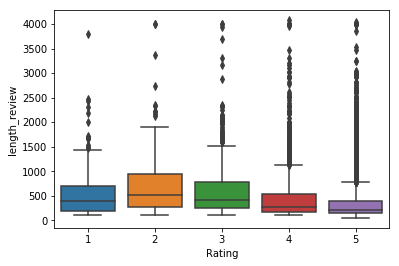

In [99]:
sns.boxplot(x='Rating', y='length_review', data=car_review)

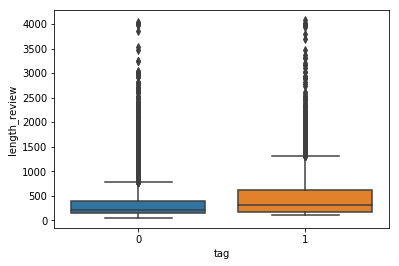

In [100]:
sns.boxplot(x='tag', y='length_review', data=car_review)

#### People write longer review when they are complaining.

### 2. Top-20 tokens for positive&negative reviews

In [107]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction import stop_words

stop_words = list(stop_words.ENGLISH_STOP_WORDS)
def count_top_word(dataset):
    count_word = car_review.Review.apply(RegexpTokenizer(r'\w+').tokenize)
    words = []
    for i in count_word:
        words.extend(i)

    words = [i for i in words if i.lower() not in stop_words]
    
    rslt = pd.DataFrame(Counter(words).most_common(20), columns=['Word', 'Frequency']).set_index('Word')
    #print(rslt)

    # plot
    rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
    plt.xticks(rotation=45)

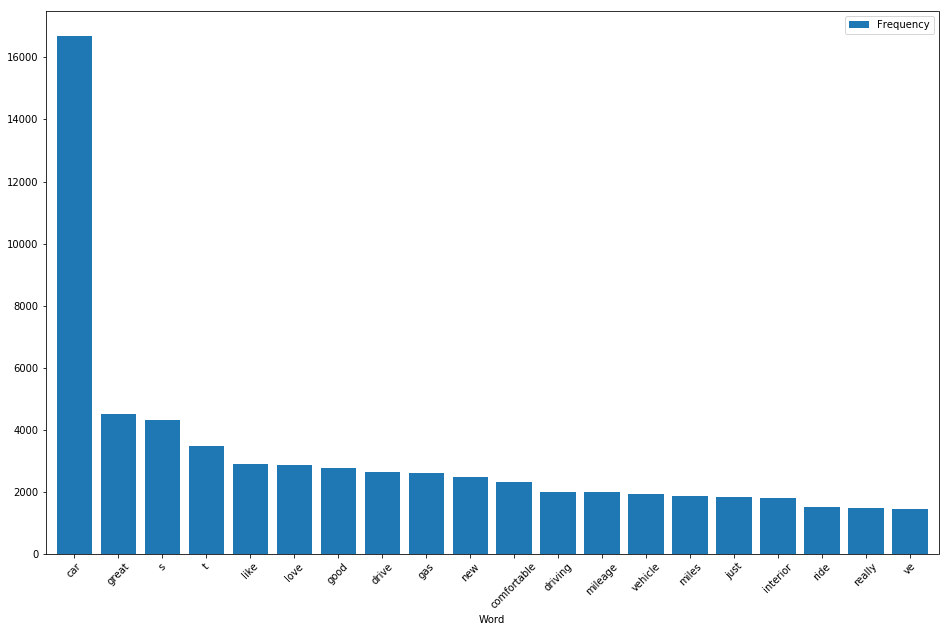

In [108]:
# Negative Reviews
count_top_word(car_review[car_review['tag']==1])

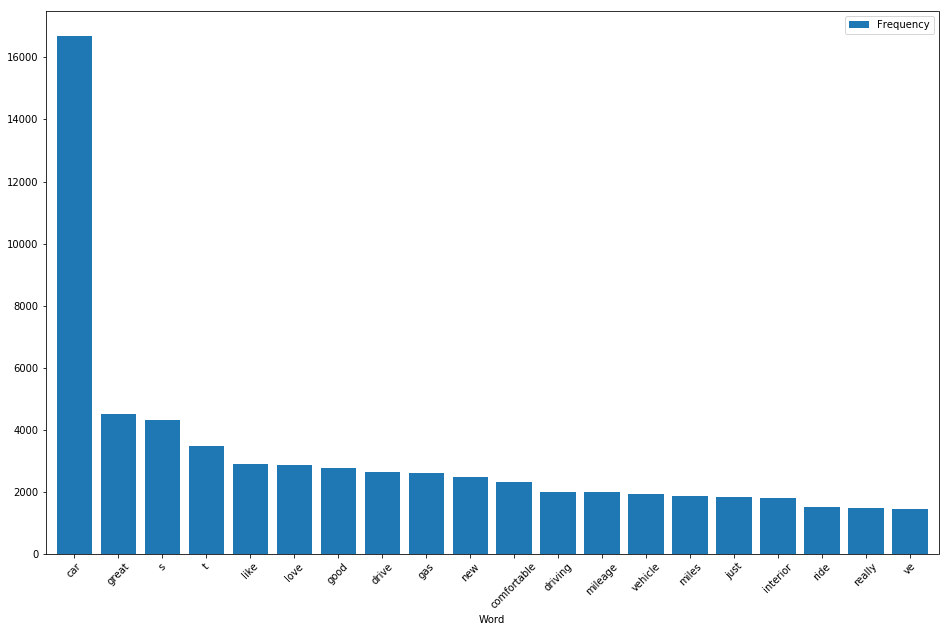

In [110]:
# Positive Reviews
count_top_word(car_review[car_review['tag']==0])

### 3. Word Cloud

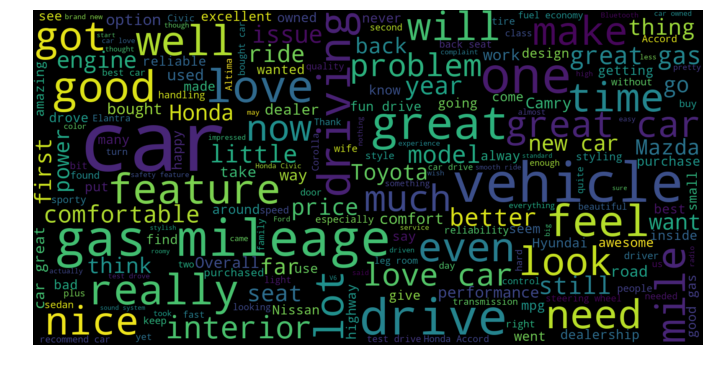

In [111]:
# Negative reviews
neg_tweets = car_review[car_review['tag']==1]
neg_string = []
for t in car_review.Review:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

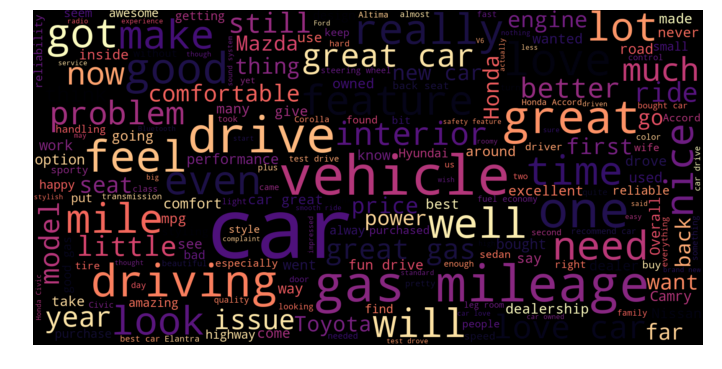

In [113]:
# Positive reviews
neg_tweets = car_review[car_review['tag']==0]
neg_string = []
for t in car_review.Review:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Overall, the word popularity for positive and negative reviews are really similar. I think this situation to some extent can explain why the count vector reprocessing method (bag-of-word) does not have good performance in the previous analysis. 